**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 7**

**Problem 7.7**


**Use pvlib to translate the single-diode model parameters obtained in Problem 7.4 for the LG345N1W-A5 module at STC into NMOT conditions, and calculate peak power at NMOT. Plot the I-V curve using 100 points and mark the maximum power point.**

*Hint: function pvsystem.calcparams_desoto translates the five single-diode model parameters at STC to any other operating conditions*


We start by importing the package [pvlib](https://pvlib-python.readthedocs.io/en/stable/) and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results

In [6]:
import pvlib
import matplotlib.pyplot as plt

We use the single diode model parameters obtained in P7.4:

In [7]:
I_L_ref = 10.58 #(A) 
I_o_ref = 2.55e-11 #(A) 
R_sh_ref = 155 #(ohms) 
R_s = 0.21 #(ohms)
n_ref = 1
# Function pvsystem.calcparams_desoto uses a_ref=n*Ns*Vth instead of just n, so we need to calculate it:
cells_in_series = 60 #Ns
temp_ref=25+273.15 #K
kB=1.38066e-23 #J/K
q=1.60218e-19 #C
a_ref = n_ref*cells_in_series*kB*temp_ref/q

#Furthermore, the function uses thermal coefficients and info on the cell technology.
EgRef=1.121 # bandgap of c-Si cells [eV]
dEgdT=- 0.0002677 # Sensitivity of bandgap wtih temperature [eV/K]
alpha_sc_rel = 0.03 #%/K, given by the manufacturer
#pvsystem.calcparams_desoto expects thermal coefficients in absolute units [A/K]
i_sc_ref = 10.57 #A, from manufacturer
alpha_sc = alpha_sc_rel/100*i_sc_ref #A/K


Then we use pvsystem.calcparams_desoto to translate the reference single-diode model parameters at STC into NMOT conditions:

In [9]:
# NMOT conditions
effective_irradiance=800 #W/m2
temp_cell=42 #°C, NMOT

# adjust the reference parameters according to the operating
# conditions using the De Soto model:
I_L_NMOT, I_o_NMOT, R_s_NMOT, R_sh_NMOT, a_NMOT = pvlib.pvsystem.calcparams_desoto(
    effective_irradiance,
    temp_cell,
    alpha_sc,
    a_ref,
    I_L_ref,
    I_o_ref,
    R_sh_ref,
    R_s,
    EgRef,
    dEgdT, 
    irrad_ref=1000, # Reference conditions at which input single diode model parameters are given (STC)
    temp_ref=25
)
n_NMOT=a_NMOT/(cells_in_series*(kB*(temp_cell+273.15)/q))
#Print single-diode model parameters
print("IL =", round(float(I_L_NMOT), 2), "(A)", "I0 =", '{:0.3e}'.format(float(I_o_NMOT)), "(A)", "Rs =", round(float(R_s_NMOT), 3), "(ohms)", "Rp =", round(float(R_sh_NMOT), 1), "(ohms)", "n =", round(float(n), 2))


IL = 8.51 (A) I0 = 3.824e-10 (A) Rs = 0.21 (ohms) Rp = 193.8 (ohms) n = 1.0


The translated parameters are identical to those calculated manually in P7.6.

Now we calculate the I-V curve for this new set of single-diode model parameters at NMOT:

In [10]:
IVcurve=pvlib.pvsystem.singlediode(photocurrent=I_L_NMOT, 
                             saturation_current=I_o_NMOT, 
                             resistance_series=R_s_NMOT, 
                             resistance_shunt=R_sh_NMOT,
                             nNsVth=a_NMOT, 
                             ivcurve_pnts=100, 
                             method='lambertw')

Vmp = 32.23 (V) Imp = 7.92 (A) Pmax = 255.2 (W)


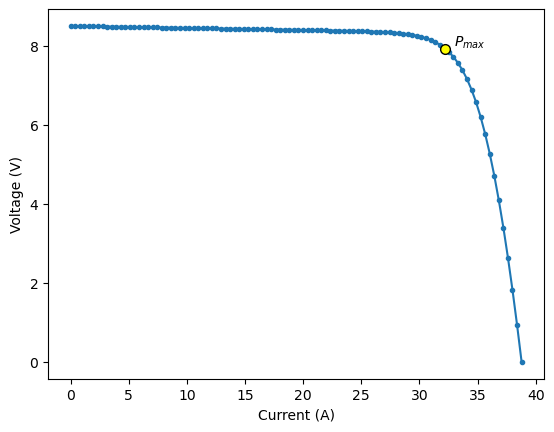

In [12]:
#Plot the I-V curve
plt.plot(IVcurve['v'],IVcurve['i'],'.-', label="I-V curve")
plt.ylabel('Voltage (V)')
plt.xlabel('Current (A)')

#Identify the values of the maximum power point to mark it on the graph
v_mp = IVcurve['v_mp']
i_mp = IVcurve['i_mp']

filled_marker_style = dict(marker='o', markersize=7,
                           color='darkgrey',
                           markerfacecolor='yellow',
                           markeredgecolor='black')
#Plot a marker at the maximum power point
plt.plot([v_mp], [i_mp], ls='', **filled_marker_style)
plt.annotate('$P_{max}$', xy=(33, 8), xycoords='data')

#Print Pmax values
print("Vmp =", round(float(v_mp), 2), "(V)", "Imp =", round(float(i_mp), 2), "(A)", "Pmax =", round(float(v_mp * i_mp), 1), "(W)")